<a href="https://colab.research.google.com/github/jayarnim/study-RBasicSyntax/blob/main/5_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("readxl")
library(readxl)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘data/readxl’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [26]:
df <- read_excel("data/Sample1.xlsx")

# 0. Glance

In [2]:
# 데이터 세트 내용 확인
View(df)

ID,SEX,AGE,AREA,AMT17,Y17_CNT,AMT16,Y16_CNT
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,50,서울,1300000,50,100000,40
2,M,40,경기,450000,25,700000,30
3,F,28,제주,275000,10,50000,5
4,M,50,서울,400000,8,125000,3
5,M,27,서울,845000,30,760000,28
6,F,23,서울,42900,1,300000,6
7,F,56,경기,150000,2,130000,2
8,F,47,서울,570000,10,400000,7
9,M,20,인천,930000,4,250000,2


In [3]:
# 데이터 세트 변수 확인
ls(df)

[1] "AGE"     "AMT16"   "AMT17"   "AREA"    "ID"      "SEX"     "Y16_CNT"
[8] "Y17_CNT"

In [4]:
# 데이터 세트 차원 확인
dim(df)

[1] 10  8

In [5]:
# 데이터 세트 변수 속성 확인
str(df)

tibble [10 × 8] (S3: tbl_df/tbl/data.frame)
 $ ID     : num [1:10] 1 2 3 4 5 6 7 8 9 10
 $ SEX    : chr [1:10] "F" "M" "F" "M" ...
 $ AGE    : num [1:10] 50 40 28 50 27 23 56 47 20 38
 $ AREA   : chr [1:10] "서울" "경기" "제주" "서울" ...
 $ AMT17  : num [1:10] 1300000 450000 275000 400000 845000 42900 150000 570000 930000 520000
 $ Y17_CNT: num [1:10] 50 25 10 8 30 1 2 10 4 17
 $ AMT16  : num [1:10] 100000 700000 50000 125000 760000 300000 130000 400000 250000 550000
 $ Y16_CNT: num [1:10] 40 30 5 3 28 6 2 7 2 16


# 1. rename

In [27]:
df <- rename(
    df,
    CNT17 = Y17_CNT,
    CNT16 = Y16_CNT
    )

df

ID,SEX,AGE,AREA,AMT17,CNT17,AMT16,CNT16
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,50,서울,1300000,50,100000,40
2,M,40,경기,450000,25,700000,30
3,F,28,제주,275000,10,50000,5
4,M,50,서울,400000,8,125000,3
5,M,27,서울,845000,30,760000,28
6,F,23,서울,42900,1,300000,6
7,F,56,경기,150000,2,130000,2
8,F,47,서울,570000,10,400000,7
9,M,20,인천,930000,4,250000,2


# 2. Derived Variables

In [28]:
df <- mutate(
    df,
    AMT = AMT17 + AMT16,
    CNT = CNT17 + CNT16
    )

df

ID,SEX,AGE,AREA,AMT17,CNT17,AMT16,CNT16,AMT,CNT
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,50,서울,1300000,50,100000,40,1400000,90
2,M,40,경기,450000,25,700000,30,1150000,55
3,F,28,제주,275000,10,50000,5,325000,15
4,M,50,서울,400000,8,125000,3,525000,11
5,M,27,서울,845000,30,760000,28,1605000,58
6,F,23,서울,42900,1,300000,6,342900,7
7,F,56,경기,150000,2,130000,2,280000,4
8,F,47,서울,570000,10,400000,7,970000,17
9,M,20,인천,930000,4,250000,2,1180000,6


In [29]:
df$AVG_AMT <- df$AMT / df$CNT

df

ID,SEX,AGE,AREA,AMT17,CNT17,AMT16,CNT16,AMT,CNT,AVG_AMT
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,50,서울,1300000,50,100000,40,1400000,90,15555.56
2,M,40,경기,450000,25,700000,30,1150000,55,20909.09
3,F,28,제주,275000,10,50000,5,325000,15,21666.67
4,M,50,서울,400000,8,125000,3,525000,11,47727.27
5,M,27,서울,845000,30,760000,28,1605000,58,27672.41
6,F,23,서울,42900,1,300000,6,342900,7,48985.71
7,F,56,경기,150000,2,130000,2,280000,4,70000.00
8,F,47,서울,570000,10,400000,7,970000,17,57058.82
9,M,20,인천,930000,4,250000,2,1180000,6,196666.67


In [30]:
df$AGE50_YN <- ifelse(
    df$AGE >= 50,
    "Y",
    "N"
    )

df

ID,SEX,AGE,AREA,AMT17,CNT17,AMT16,CNT16,AMT,CNT,AVG_AMT,AGE50_YN
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,F,50,서울,1300000,50,100000,40,1400000,90,15555.56,Y
2,M,40,경기,450000,25,700000,30,1150000,55,20909.09,N
3,F,28,제주,275000,10,50000,5,325000,15,21666.67,N
4,M,50,서울,400000,8,125000,3,525000,11,47727.27,Y
5,M,27,서울,845000,30,760000,28,1605000,58,27672.41,N
6,F,23,서울,42900,1,300000,6,342900,7,48985.71,N
7,F,56,경기,150000,2,130000,2,280000,4,70000.00,Y
8,F,47,서울,570000,10,400000,7,970000,17,57058.82,N
9,M,20,인천,930000,4,250000,2,1180000,6,196666.67,N


In [33]:
df$AGE_GR10 <- ifelse(
    df$AGE >= 50,
    "A1.50++",
    ifelse(
        df$AGE >= 40,
        "A2.4049",
        ifelse(
            df$AGE >= 30,
            "A3.3039",
            ifelse(
                df$AGE >= 20,
                "A4.2029",
                "A5.0019"
                )
            )
        )
    )

df

ID,SEX,AGE,AREA,AMT17,CNT17,AMT16,CNT16,AMT,CNT,AVG_AMT,AGE50_YN,AGE_GR10
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,F,50,서울,1300000,50,100000,40,1400000,90,15555.56,Y,A1.50++
2,M,40,경기,450000,25,700000,30,1150000,55,20909.09,N,A2.4049
3,F,28,제주,275000,10,50000,5,325000,15,21666.67,N,A4.2029
4,M,50,서울,400000,8,125000,3,525000,11,47727.27,Y,A1.50++
5,M,27,서울,845000,30,760000,28,1605000,58,27672.41,N,A4.2029
6,F,23,서울,42900,1,300000,6,342900,7,48985.71,N,A4.2029
7,F,56,경기,150000,2,130000,2,280000,4,70000.00,Y,A1.50++
8,F,47,서울,570000,10,400000,7,970000,17,57058.82,N,A2.4049
9,M,20,인천,930000,4,250000,2,1180000,6,196666.67,N,A4.2029


# 3. Filtering

In [8]:
install.packages("dplyr")
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




## select

In [34]:
df %>% select(ID, AREA)

ID,AREA
<dbl>,<chr>
1,서울
2,경기
3,제주
4,서울
5,서울
6,서울
7,경기
8,서울
9,인천


In [40]:
df %>% select(-SEX, -AGE)

ID,AREA,AMT17,CNT17,AMT16,CNT16,AMT,CNT,AVG_AMT,AGE50_YN,AGE_GR10
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,서울,1300000,50,100000,40,1400000,90,15555.56,Y,A1.50++
2,경기,450000,25,700000,30,1150000,55,20909.09,N,A2.4049
3,제주,275000,10,50000,5,325000,15,21666.67,N,A4.2029
4,서울,400000,8,125000,3,525000,11,47727.27,Y,A1.50++
5,서울,845000,30,760000,28,1605000,58,27672.41,N,A4.2029
6,서울,42900,1,300000,6,342900,7,48985.71,N,A4.2029
7,경기,150000,2,130000,2,280000,4,70000.00,Y,A1.50++
8,서울,570000,10,400000,7,970000,17,57058.82,N,A2.4049
9,인천,930000,4,250000,2,1180000,6,196666.67,N,A4.2029


## filter

In [39]:
df %>% filter((AREA == "서울") & (CNT17 >= 10))

ID,SEX,AGE,AREA,AMT17,CNT17,AMT16,CNT16,AMT,CNT,AVG_AMT,AGE50_YN,AGE_GR10
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,F,50,서울,1300000,50,100000,40,1400000,90,15555.56,Y,A1.50++
5,M,27,서울,845000,30,760000,28,1605000,58,27672.41,N,A4.2029
8,F,47,서울,570000,10,400000,7,970000,17,57058.82,N,A2.4049


## arrange

In [44]:
df %>% arrange(AGE)

ID,SEX,AGE,AREA,AMT17,CNT17,AMT16,CNT16,AMT,CNT,AVG_AMT,AGE50_YN,AGE_GR10
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
9,M,20,인천,930000,4,250000,2,1180000,6,196666.67,N,A4.2029
6,F,23,서울,42900,1,300000,6,342900,7,48985.71,N,A4.2029
5,M,27,서울,845000,30,760000,28,1605000,58,27672.41,N,A4.2029
3,F,28,제주,275000,10,50000,5,325000,15,21666.67,N,A4.2029
10,F,38,경기,520000,17,550000,16,1070000,33,32424.24,N,A3.3039
2,M,40,경기,450000,25,700000,30,1150000,55,20909.09,N,A2.4049
8,F,47,서울,570000,10,400000,7,970000,17,57058.82,N,A2.4049
1,F,50,서울,1300000,50,100000,40,1400000,90,15555.56,Y,A1.50++
4,M,50,서울,400000,8,125000,3,525000,11,47727.27,Y,A1.50++


In [45]:
df %>% arrange(desc(AGE))

ID,SEX,AGE,AREA,AMT17,CNT17,AMT16,CNT16,AMT,CNT,AVG_AMT,AGE50_YN,AGE_GR10
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
7,F,56,경기,150000,2,130000,2,280000,4,70000.00,Y,A1.50++
1,F,50,서울,1300000,50,100000,40,1400000,90,15555.56,Y,A1.50++
4,M,50,서울,400000,8,125000,3,525000,11,47727.27,Y,A1.50++
8,F,47,서울,570000,10,400000,7,970000,17,57058.82,N,A2.4049
2,M,40,경기,450000,25,700000,30,1150000,55,20909.09,N,A2.4049
10,F,38,경기,520000,17,550000,16,1070000,33,32424.24,N,A3.3039
3,F,28,제주,275000,10,50000,5,325000,15,21666.67,N,A4.2029
5,M,27,서울,845000,30,760000,28,1605000,58,27672.41,N,A4.2029
6,F,23,서울,42900,1,300000,6,342900,7,48985.71,N,A4.2029


# 4. Aggregating

## Statistic Functions

In [59]:
install.packages("psych")
library(psych)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘mnormt’




In [64]:
# 합계
sum(df$AGE)

# 평균
mean(df$AGE)

# 중앙값
median(df$AGE)

# 최댓값
max(df$AGE)

# 최솟값
min(df$AGE)

# 범위
range(df$AGE)

# 분위수
quantile(df$AGE, probs = seq(0, 1, 0.25))

# 분산
var(df$AGE)

# 표준편차
sd(df$AGE)

# 첨도
kurtosi(df$AGE)

# 왜도
skew(df$AGE)

[1] 379

[1] 37.9

[1] 39

[1] 56

[1] 20

[1] 20 56

0%   25%   50%   75%  100% 
20.00 27.25 39.00 49.25 56.00

[1] 162.9889

[1] 12.76671

[1] -1.747431

[1] -0.05156207

In [80]:
summary(df)

       ID            SEX                 AGE            AREA          
 Min.   : 1.00   Length:10          Min.   :20.00   Length:10         
 1st Qu.: 3.25   Class :character   1st Qu.:27.25   Class :character  
 Median : 5.50   Mode  :character   Median :39.00   Mode  :character  
 Mean   : 5.50                      Mean   :37.90                     
 3rd Qu.: 7.75                      3rd Qu.:49.25                     
 Max.   :10.00                      Max.   :56.00                     
     AMT17             CNT17          AMT16            CNT16     
 Min.   :  42900   Min.   : 1.0   Min.   : 50000   Min.   : 2.0  
 1st Qu.: 306250   1st Qu.: 5.0   1st Qu.:126250   1st Qu.: 3.5  
 Median : 485000   Median :10.0   Median :275000   Median : 6.5  
 Mean   : 548290   Mean   :15.7   Mean   :336500   Mean   :13.9  
 3rd Qu.: 776250   3rd Qu.:23.0   3rd Qu.:512500   3rd Qu.:25.0  
 Max.   :1300000   Max.   :50.0   Max.   :760000   Max.   :40.0  
      AMT               CNT          AVG_

In [81]:
describe(df)

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
ID,1,10,5.50,3.027650e+00,5.50,5.500,3.7065,1.00,10.0,9.0,0.00000000,-1.5616364,9.574271e-01
SEX*,2,10,1.40,5.163978e-01,1.00,1.375,0.0000,1.00,2.0,1.0,0.34856850,-2.0550000,1.632993e-01
AGE,3,10,37.90,1.276671e+01,39.00,37.875,16.3086,20.00,56.0,36.0,-0.05156207,-1.7474305,4.037188e+00
AREA*,4,10,2.00,9.428090e-01,2.00,1.875,0.7413,1.00,4.0,3.0,0.71594562,-0.4687500,2.981424e-01
AMT17,5,10,548290.00,3.830392e+05,485000.00,517500.000,404008.5000,42900.00,1300000.0,1257100.0,0.51531327,-0.9335146,1.211276e+05
CNT17,6,10,15.70,1.539877e+01,10.00,13.250,11.1195,1.00,50.0,49.0,0.98340486,-0.2616048,4.869520e+00
AMT16,7,10,336500.00,2.571862e+05,275000.00,319375.000,240922.5000,50000.00,760000.0,710000.0,0.46008110,-1.5037415,8.132941e+04
CNT16,8,10,13.90,1.388404e+01,6.50,12.125,6.6717,2.00,40.0,38.0,0.69397748,-1.2845596,4.390520e+00
AMT,9,10,884790.00,4.813663e+05,1020000.00,870362.500,648637.5000,280000.00,1605000.0,1325000.0,-0.03644006,-1.7181262,1.522214e+05


## Group by Cat Variable

In [51]:
df %>% group_by(AREA) %>% summarize(합계 = sum(AGE))

AREA,합계
<chr>,<dbl>
경기,134
서울,197
인천,20
제주,28


In [52]:
df %>% group_by(AREA) %>% reframe(
    평균 = mean(AGE),
    중앙값 = median(AGE),
    최댓값 = max(AGE),
    최솟값 = min(AGE)
    )

AREA,평균,중앙값,최댓값,최솟값
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
경기,44.66667,40,56,38
서울,39.40000,47,50,23
인천,20.00000,20,20,20
제주,28.00000,28,28,28


## Visualizing

In [70]:
install.packages("descr")
library(descr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘xtable’




### Frequency

In [83]:
table(df$AREA)


경기 서울 인천 제주 
   3    5    1    1 

,Frequency,Percent
경기,3,30
서울,5,50
인천,1,10
제주,1,10
Total,10,100


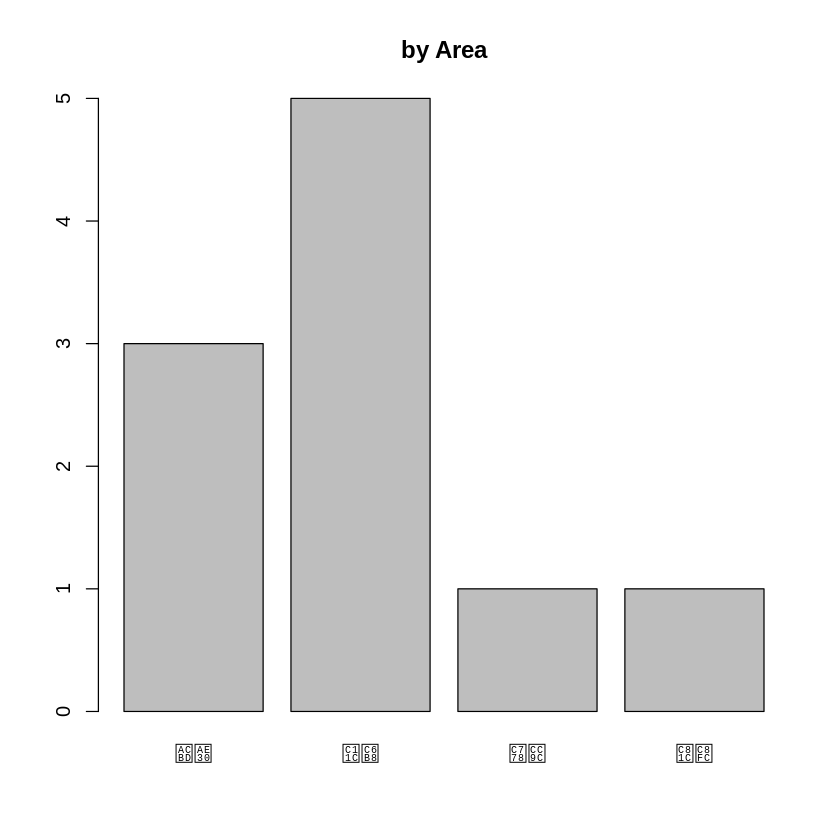

In [77]:
freq(
    df$AREA,
    plot = TRUE,
    main = "by Area"
    )

### hist

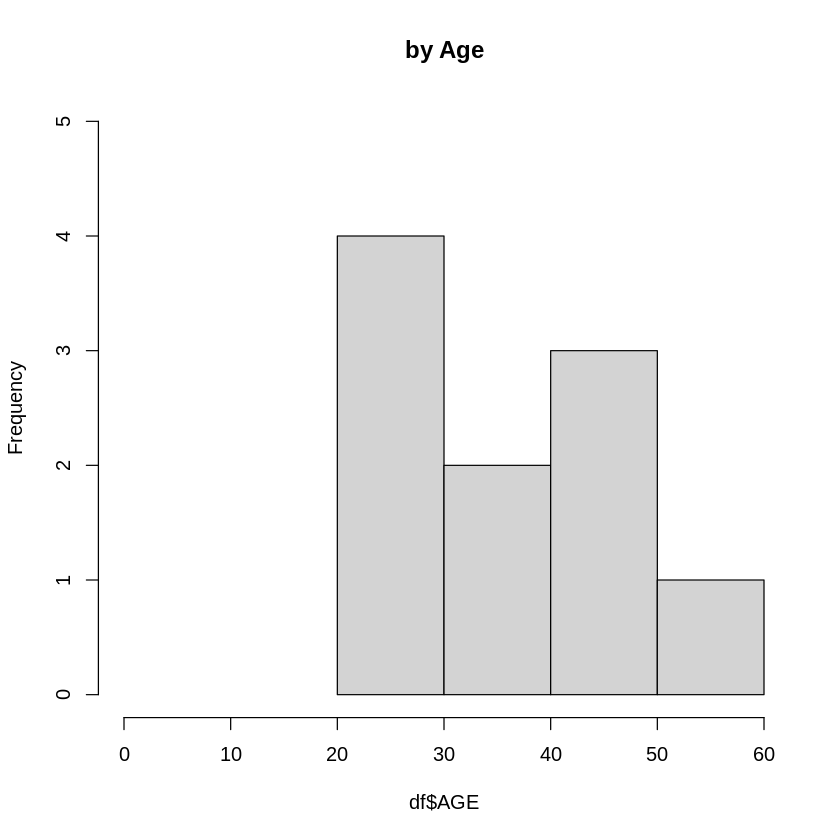

In [78]:
hist(
    df$AGE,
    xlim = c(0, 60),
    ylim = c(0, 5),
    main = "by Age"
    )

### bar

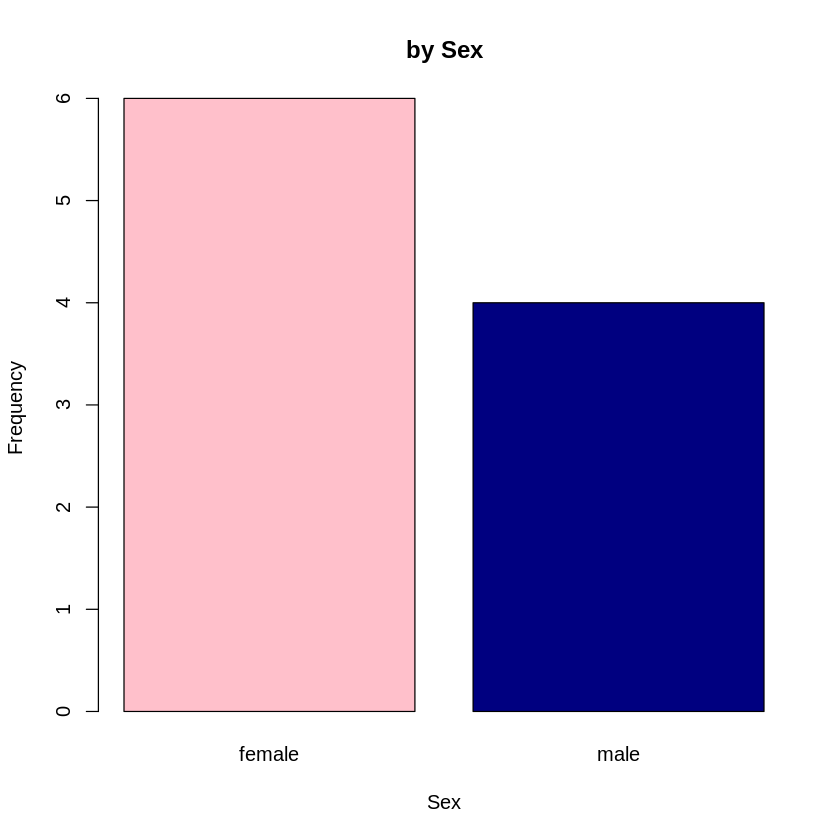

In [87]:
barplot(
    table(df$SEX),
    main = "by Sex",
    xlab = "Sex",
    ylab = "Frequency",
    names = c("female", "male"),
    col = c("pink", "navy")
    )

### box

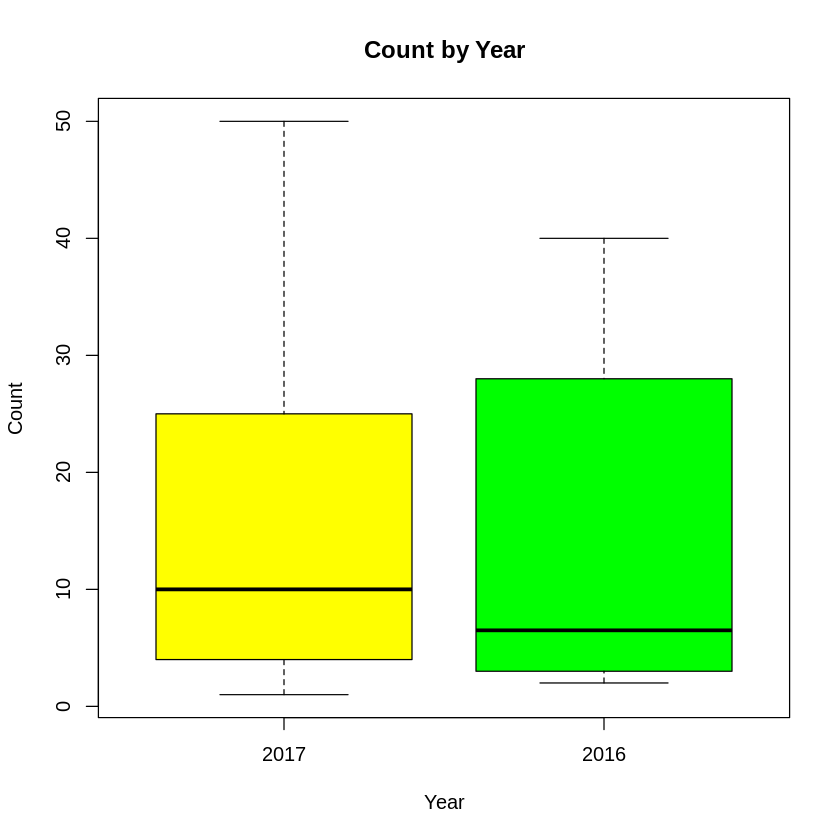

In [89]:
boxplot(
    df$CNT17, df$CNT16,
    main = "Count by Year",
    xlab = "Year",
    ylab = "Count",
    names = c("2017", "2016"),
    col = c("yellow", "green")
    )

# 5. Join

## 세로 결합(행 결합)

In [ ]:
m_history <- read_excel("data/Sample2.xlsx")
f_history <- read_excel("data/Sample3.xlsx")

In [91]:
history <- bind_rows(m_history, f_history)
history

ID,SEX,AGE,AREA,AMT17,Y17_CNT,AMT16,Y16_CNT
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
2,M,40,경기,450000,25,700000,30
4,M,50,서울,400000,8,125000,3
5,M,27,서울,845000,30,760000,28
9,M,20,인천,930000,4,250000,2
1,F,50,서울,1300000,50,100000,40
3,F,28,제주,275000,10,50000,5
6,F,23,서울,42900,1,300000,6
7,F,56,경기,150000,2,130000,2
8,F,47,서울,570000,10,400000,7


## 가로 결합(열 결합)

In [93]:
y17_history <- read_excel("data/Sample4.xlsx")
y16_history <- read_excel("data/Sample5.xlsx")

### left_join

In [94]:
# 결합 기준 변수 ID 에 대하여 좌측 데이터 세트(y17_history) 중심으로 결합
# ID == 3, 6 인 데이터는 좌측 데이터 세트에 존재하지 않으므로 누락되었음

left_join(y17_history, y16_history, by = "ID")

ID,SEX,AGE,AREA,AMT17,Y17_CNT,AMT16,Y16_CNT
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,50,서울,1300000,50,100000,40
2,M,40,경기,450000,25,700000,30
4,M,50,서울,400000,8,125000,3
5,M,27,서울,845000,30,760000,28
7,F,56,경기,150000,2,130000,2
8,F,47,서울,570000,10,400000,7
9,M,20,인천,930000,4,NA,NA
10,F,38,경기,520000,17,550000,16


### inner_join

In [97]:
# 결합 기준 변수 ID 에 대하여 두 데이터 세트의 교집합만 결합
# ID == 3, 6 은 좌측 데이터 세트에, ID == 9 는 우측 데이터 세트에 존재하지 않으므로 누락되었음

inner_join(y17_history, y16_history, by = "ID")

ID,SEX,AGE,AREA,AMT17,Y17_CNT,AMT16,Y16_CNT
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,50,서울,1300000,50,100000,40
2,M,40,경기,450000,25,700000,30
4,M,50,서울,400000,8,125000,3
5,M,27,서울,845000,30,760000,28
7,F,56,경기,150000,2,130000,2
8,F,47,서울,570000,10,400000,7
10,F,38,경기,520000,17,550000,16


### full_join

In [98]:
# 결합 기준 변수 ID 에 대하여 두 데이터 세트의 합집합을 결합

full_join(y17_history, y16_history, by = "ID")

ID,SEX,AGE,AREA,AMT17,Y17_CNT,AMT16,Y16_CNT
<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
1,F,50,서울,1300000,50,100000,40
2,M,40,경기,450000,25,700000,30
4,M,50,서울,400000,8,125000,3
5,M,27,서울,845000,30,760000,28
7,F,56,경기,150000,2,130000,2
8,F,47,서울,570000,10,400000,7
9,M,20,인천,930000,4,NA,NA
10,F,38,경기,520000,17,550000,16
3,NA,NA,NA,NA,NA,50000,5
